# Summary-file for Business analytics <a id = top>

This notebook is to use on the exam in BBAN3001 Essentials of Business Analytics. The notebook uses some example-files to illustrate different functions.

<h1>Summary</h1>
<ul>
    <li>General
        <ul>
            <li><a href = #importPackages >Import needed packages</a></li>
            <li><a href = #Info >Info/Describe</a></li>
            <li><a href = #corrmatrix >Correlation Matrix</a></li>
            <li><a href = #convert >Convert Pandas/Numpy<a/></li>
            <li><a href = #colrow > Change columns/rows</a></li>
            <li><a href = #NV >Null-values</a></li>
            <li><a href = #TTS >Train Test Split</a></li>
            <li><a href = #dummyvar >Dummy variables</a></li>
            <li><a href = #LabelEncoder >Label Encoder</a></li>
            <li><a href = #MinMaxScaler >MinMaxScaler</a></li>
        </ul>
    </li>
    <li><a href = #Visualization>Visualization</a>
        <ul>
            <li><a href = #histogram >Histogram</a></li>
            <li><a href = #pairplot >Pairplot</a></li>
            <li><a href = #crosstable >Crosstable</a></li>
            <li><a href = #scatterplot >Scatterplot (Matplotlib/Seaborn)</a></li>
            <li><a href = #relplot > Relplot (Seaborn)</a></li>
        </ul>
    </li>
    <li>Topics
        <ul>
            <li><a href = #LinReg>Linear Regression</a>
                <ul>
                    <li><a href = #OLS >Ordinary Least Squares (OLS)</a></li>
                    <li><a href = #LinearRegression >LinearRegression()</a></li>
                </ul>
            </li>
            <li><a href = #LogReg>Logistic Regression</a>
                <ul>
                    <li><a href = #LogRegE1 >Example 1: Insurance data</a></li>
                    <li><a href = #LogRegE2 >Example 2: Financial condition of banks</a></li>
                    <li><a href = #incomeClass >Example 3: Income class classification</a></li>
                </ul>
            </li>
            <li><a href = #NBC>Naive Bayes Classification</a>
                <ul>
                    <li><a href = #GaussianNB >GaussianNB</a></li>
                </ul>
            </li>
            <li><a href = #KMC>K-Means Clustering</a>
                <ul>
                    <li><a href = #MinMaxScalerKM >MinMaxScaler</a></li>
                    <li><a href = #ElbowPlot >Elbow Plot</a></li>
                </ul>
            </li>
            <li><a href = #ANN>Artificial Neural Network</a>
                <ul>
                    <li><a href = #prediction >Prediction</a></li>
                    <li><a href = #classificationBin >Classification (binary)</a></li>
                    <li><a href = #classificationMulti >Classification (multiclass)</a></li>
                </ul>
            </li>
        </ul>
    </ul>
</ul>

## General

#### Import needed packages <a id=importPackages>

To check whats in a package use:
```python 
dir(package)



In [1]:
# General
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import sklearn.datasets #dir(sklearn.datasets)

# Linear Regression
from sklearn import linear_model
import statsmodels.api as sm #General(?)

# Logistic Regression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from seaborn import heatmap as hm

# K-Means Clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Artificial Neural Network
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Check whats in a package:
#dir(package)

ModuleNotFoundError: No module named 'statsmodels'

#### Info/Describe <a id = Info>

In [ ]:
# Import file from csv
df = pd.read_csv('housing.csv')

In [ ]:
# Look at the shape and head
print(df.shape)
df.head(1)

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


In [ ]:
# See specific rows/columns
df.loc[26,:] #loc[row,column]

longitude              -122.28
latitude                 37.85
housing_median_age        49.0
total_rooms             1130.0
total_bedrooms           244.0
population               607.0
households               239.0
median_income           2.4597
median_house_value     93800.0
ocean_proximity       NEAR BAY
Name: 26, dtype: object

In [ ]:
# Select specific rows/columns based on criteria
df.loc[df['ocean_proximity']=='NEAR BAY','population']

0         322.0
1        2401.0
2         496.0
3         558.0
4         565.0
          ...  
19067    1374.0
19068    1277.0
19069    1994.0
19077    1657.0
19104    2808.0
Name: population, Length: 2290, dtype: float64

In [ ]:
# See some information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Count the number of unique values
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
# See means with different values of a variable. This will only be relevant with few unique values for the variable
df.groupby('ocean_proximity').mean()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


In [ ]:
# We can generate a pivot table to see the distribution. Agian this is also most releavnt with few unique values
df.pivot_table(index = 'ocean_proximity', columns = 'total_rooms', aggfunc='sum')

households                                                  \
total_rooms        2.0     6.0     8.0     11.0    12.0    15.0    16.0      
ocean_proximity                                                              
<1H OCEAN              NaN     NaN     NaN    13.0     NaN     6.0     NaN   
INLAND                 2.0     2.0     NaN     NaN     NaN     NaN     NaN   
ISLAND                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
NEAR BAY               NaN     NaN     1.0     NaN     7.0     NaN     NaN   
NEAR OCEAN             NaN     NaN     NaN     NaN     NaN     3.0     3.0   

                                         ... total_bedrooms                  \
total_rooms     18.0    19.0    20.0     ...        27700.0 27870.0 28258.0   
ocean_proximity                          ...                                  
<1H OCEAN           4.0     NaN     5.0  ...         4179.0     NaN  3864.0   
INLAND              9.0    15.0     9.0  ...            NaN  5027.0     NaN   
ISLAND              NaN     NaN     NaN  ...            NaN     NaN     NaN   
NEAR BAY            4.0     NaN     NaN  ...            NaN     NaN     NaN   
NEAR OCEAN          NaN     NaN     NaN  ...            NaN     NaN     NaN   

                                                                         
total_rooms     30401.0 30405.0 30450.0 32054.0 32627.0 37937.0 39320.0  
ocean_proximity                                                          
<1H OCEAN        4957.0     NaN  5033.0  5290.0  6445.0  5471.0     NaN  
INLAND              NaN     NaN     NaN     NaN     NaN     NaN  6210.0  
ISLAND              NaN     NaN     NaN     NaN     NaN     NaN     NaN  
NEAR BAY            NaN     NaN     NaN     NaN     NaN     NaN     NaN  
NEAR OCEAN          NaN  4093.0     NaN     NaN     NaN     NaN     NaN  

[5 rows x 47408 columns]

See <a href = #PiviotTable >this</a> example on a piviot table

#### Correlation Matrix <a id = corrmatrix>

In [ ]:
# Make the correlation matrix
corr_matrix = df[['median_house_value','housing_median_age', 'population']].corr()
#corr_matrix = df.corr()

print(corr_matrix['median_house_value'].sort_values(ascending=False))
#print(corr_matrix)

median_house_value    1.000000
housing_median_age    0.105623
population           -0.024650
Name: median_house_value, dtype: float64


#### Convert Pandas/Numpy <a id = convert>

In [ ]:
# Convert from Pandas to Numpy
df_numpy = df.to_numpy()

# Convert from Numpy to Pandas
df_Pandas = pd.DataFrame(df_numpy) #Have to specify the column-names: (Columns = ['Col1','col2'])

#### Change columns/rows <a id=colrow>

In [ ]:
# Delete a column
df.drop('total_rooms', inplace=True, axis=1)

In [ ]:
# Remove rows with a specific value
df.drop(df[df['population'] < 10].index, inplace = True)

In [ ]:
# Pick all columns except one
df_no_households = df.drop('households', axis = 1)
#df_no_households.head()

#### Null-values <a id=NV>

In [ ]:
# Check for null-values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# Remove null-values
df = df.dropna()
#df.isnull().sum()

In [ ]:
# Replace null-values
df = df.fillna(df['total_bedrooms'].mean()) #This will replace null-values with the mean

#### Train Test Split <a id = TTS>

In [ ]:
# Import package
from sklearn.model_selection import train_test_split

# Define X and y
X = df.drop('population', axis = 1)
y = df['population']

# Split to Train Test Set
df_train, df_test = train_test_split(df, train_size = 0.8, shuffle = True)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, shuffle = True)

In [ ]:
# One-dimentional objects sometimes cause problems (important!), therefore we will convert everything in to dataframes

print(y_train.shape, type(y_train))
y_train = pd.DataFrame(y_train)
print(y_train.shape, type(y_train))

y_test = pd.DataFrame(y_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

(16339,) <class 'pandas.core.series.Series'>
(16339, 1) <class 'pandas.core.frame.DataFrame'>


#### Dummy variables <a id = dummyvar>

In [ ]:
# Make some extra columns of 'ocean_proximity' to use on dummy variables and label-encoder
df_dummy_var = pd.DataFrame(df['ocean_proximity'])
df_label_encoder = pd.DataFrame(df[['population','ocean_proximity']])

In [ ]:
print(f"The number of columns before making dummy variables: {len(df_dummy_var.columns)}.")
df_dummy_var = pd.get_dummies(df_dummy_var)
print(f"The number of columns is now: {len(df_dummy_var.columns)}.")

The number of columns before making dummy variables: 1.
The number of columns is now: 5.


#### Label Encoder <a id = LabelEncoder>

In [ ]:
# Import needed packages
from sklearn.preprocessing import LabelEncoder

# Create the Label Encoder
le = LabelEncoder()

# Fit the Label Encoder
le.fit(df_label_encoder['ocean_proximity'])

# See the classes
print('Classes:', le.classes_)

# Transform
transformed = le.transform(df_label_encoder['ocean_proximity'])

# Add the Label Encoder to the dataframe
df_label_encoder['ocean_proximity_LE'] = transformed

# Can also do everything in one step:
df_label_encoder['ocean_proximity_LE2'] = le.fit_transform(df_label_encoder['ocean_proximity'])

Classes: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


#### MinMaxScaler <a id = MinMaxScaler >

In [ ]:
# Import needed packages
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

scaled = ['median_house_value','housing_median_age', 'population']
for col in scaled:
    df[col] = scaler.fit_transform(df[[col]])

## Visualization <a id = Visualization>

In [ ]:
# Libaries needed for visualization
import matplotlib.pyplot as plt
import seaborn as sb

#### Histogram <a id = histogram>

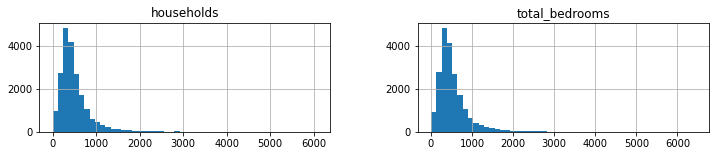

In [ ]:
# Histogram show distribution.
df[['households','total_bedrooms']].hist(bins=50, figsize=(12,2))
plt.show()

# Alternative:
#plt.hist(df['total_bedrooms'])

#### Pairplot <a id = pairplot >

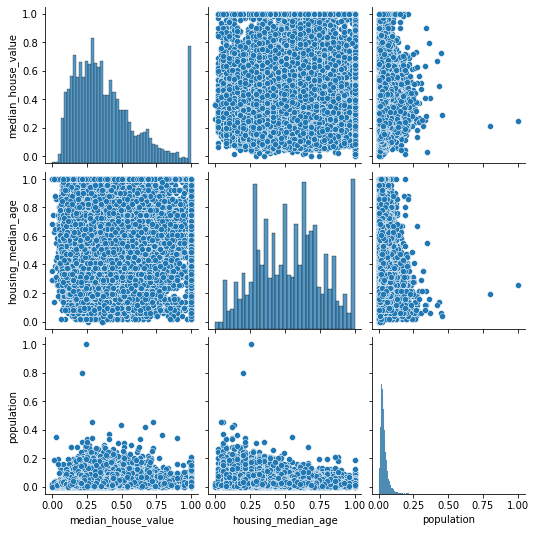

In [ ]:
# Variables we want to pairplot
variables = ['median_house_value','housing_median_age', 'population']

# Plot the pairplot
sb.pairplot(df[variables])
plt.show()

#### Crosstable <a id = crosstable >

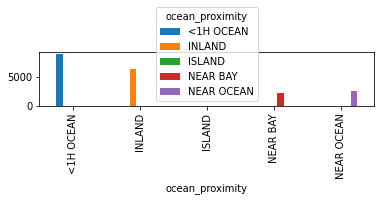

In [ ]:
# There is no point showing a crosstable with the varibles in the df
pd.crosstab(df['ocean_proximity'],df['ocean_proximity']).plot(kind='bar', figsize=(6,1))
plt.show()

#### Scatterplot (Matplotlib/Seaborn) <a id = scatterplot>

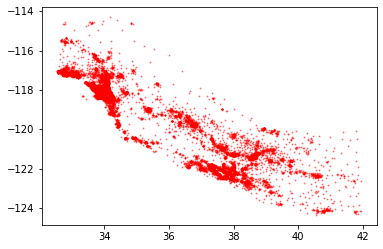

In [ ]:
plt.scatter(df['latitude'],df['longitude'], s=1, alpha = 0.4, color = 'red' )
#sb.scatterplot(x=df['latitude'],y=df['longitude']) 
plt.show()

#### Relplot (Seaborn) <a id=relplot>

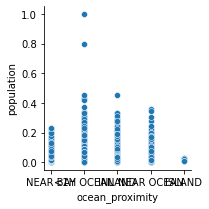

In [ ]:
sb.relplot(x = df['ocean_proximity'], y = df['population'], height=3) #hue, alpha
plt.show()

## Linear Regression <a id=LinReg >

Linear regression is used when we got different variables that influence a dependent varible. The equation will be:                 
`y = b0 + b1*x1 + b2*x2 ... + bn*xn + e, e = random error`

The example we are going to follow here is based on the 'Toyota Corolla' Exercise from class.

In [ ]:
# Start by importing the needed libaries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
# Import dataframe from csv
df = pd.read_csv('ToyotaCorolla.csv')

In [ ]:
# Take a look at the data
df.head(1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0


In [ ]:
# Define the varibles we are going to use in this example
df = df[['Price','Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period','Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows',  'Sport_Model', 'Tow_Bar']]

In [ ]:
# Check out how the data is:
df.info()
# We can see that the Fuel_type column is object, and therefore we must do something with it later on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             1436 non-null   int64 
 1   Age_08_04         1436 non-null   int64 
 2   KM                1436 non-null   int64 
 3   Fuel_Type         1436 non-null   object
 4   HP                1436 non-null   int64 
 5   Automatic         1436 non-null   int64 
 6   Doors             1436 non-null   int64 
 7   Quarterly_Tax     1436 non-null   int64 
 8   Mfr_Guarantee     1436 non-null   int64 
 9   Guarantee_Period  1436 non-null   int64 
 10  Airco             1436 non-null   int64 
 11  Automatic_airco   1436 non-null   int64 
 12  CD_Player         1436 non-null   int64 
 13  Powered_Windows   1436 non-null   int64 
 14  Sport_Model       1436 non-null   int64 
 15  Tow_Bar           1436 non-null   int64 
dtypes: int64(15), object(1)
memory usage: 179.6+ KB


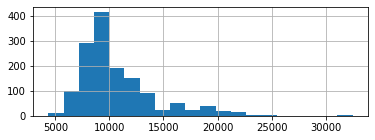

In [ ]:
# Visualize the data
df['Price'].hist(bins=20, figsize=(6,2))
plt.show()
# We could (and should) visualize the data on other ways, and different variables to look for outliers etc. 

In [ ]:
# Check for null-values
df.isnull().sum()

Price               0
Age_08_04           0
KM                  0
Fuel_Type           0
HP                  0
Automatic           0
Doors               0
Quarterly_Tax       0
Mfr_Guarantee       0
Guarantee_Period    0
Airco               0
Automatic_airco     0
CD_Player           0
Powered_Windows     0
Sport_Model         0
Tow_Bar             0
dtype: int64

Nice, no null-values, we continue. If we had null-values we would like to do something with them: <a href = #NV> Click here</a>

Now we have to make dummy-variables for the `Fuel_type` varible. For info on dummy variables: <a href = #dummyvar > Click here</a>

In [ ]:
df = pd.get_dummies(df)

The next thing we have to do is to split to training and test set. For info on that: <a href = #TTS > Click here</a>

In [ ]:
# Define X and y
X = df.drop('Price', axis = 1)
y = df['Price']

# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, shuffle = True)

In [ ]:
# One-dimentional objects sometimes cause problems (important!), therefore we will convert everything in to dataframes

#print(y_train.shape, type(y_train))
#y_train = pd.DataFrame(y_train)
#print(y_train.shape, type(y_train))

#y_test = pd.DataFrame(y_test)
#X_train = pd.DataFrame(X_train)
#X_test = pd.DataFrame(X_test)

Now we have splitted the data into training and test set, so we will now apply the model. There is two different models we can use, namely the `sm.OLS` (statsmodel) and the `LinearRegression()` (sklearn). We will show both.

#### Ordinary Least Squares (OLS) <a id = OLS>

In [ ]:
# Import the needed libary
import statsmodels.api as sm

# Define the model
model = sm.OLS(y_train, X_train)

# Fit the model
model_est = model.fit()

# Print out the statistics
model_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     575.2
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        08:47:35   Log-Likelihood:                -9803.9
No. Observations:                1148   AIC:                         1.964e+04
Df Residuals:                    1131   BIC:                         1.973e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -110.0770      3.164    -34.785      0.000    -116.286    -103.868
KM                  -0.0195      0.001    -13.909      0.000      -0.022      -0.017
HP                  35.8547      3.190     11.241      0.000      29.596      42.113
Automatic          533.1637    165.932      3.213      0.001     207.594     858.734
Doors              155.8516     40.457      3.852      0.000      76.472     235.231
Quarterly_Tax       16.3237      1.857      8.788      0.000      12.679      19.968
Mfr_Guarantee      223.8234     79.095      2.830      0.005      68.635     379.012
Guarantee_Period    80.9540     13.560      5.970      0.000      54.348     107.560
Airco              172.5885     93.289      1.850      0.065     -10.450     355.627
Automatic_airco   3175.9627    190.084     16.708      0.000    2803.005    3548.920
CD_Player          199.7548    104.565      1.910      0.056      -5.408     404.917
Powered_Windows    487.9581     88.617      5.506      0.000     314.086     661.831
Sport_Model        403.5317     85.581      4.715      0.000     235.616     571.448
Tow_Bar           -194.3241     86.665     -2.242      0.025    -364.367     -24.281
Fuel_Type_CNG     9664.0293    604.306     15.992      0.000    8478.342    1.08e+04
Fuel_Type_Diesel  1.171e+04    474.451     24.685      0.000    1.08e+04    1.26e+04
Fuel_Type_Petrol  1.146e+04    421.104     27.211      0.000    1.06e+04    1.23e+04
==============================================================================
Omnibus:                      163.104   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              502.690
Skew:                           0.706   Prob(JB):                    6.95e-110
Kurtosis:                       5.918   Cond. No.                     1.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print('adjusted R squared:', model_est.rsquared_adj)
print('AIC:', model_est.aic)
print('BIC:', model_est.bic)

adjusted R squared: 0.8890146126383847
AIC: 19641.76051298616
BIC: 19727.53871479311


In [ ]:
# Predict on test set
y_pred = model_est.predict(X_test)

In [ ]:
# Calculate the errors in test
test_errors = (y_pred - y_test)
squared_test_errors = test_errors**2
absolute_test_errors = abs(test_errors)

# Calculate the Mean squared error
print(f'MSE: {squared_test_errors.mean()}')
print(f'Root MSE {squared_test_errors.mean()**(1/2)}')
print(f'MAE: {absolute_test_errors.mean()}')

MSE: 1183535.33983076
Root MSE 1087.9041041519974
MAE: 867.084146701512


Now lets take a look at the predicted y against the tested y.

In [ ]:
y_test_table = pd.DataFrame(y_test)
y_test_table['Predicted Price'] = y_pred.round()
y_test_table['Error'] = y_pred-y_test
y_test_table.head()

,Price,Predicted Price,Error
778,8950,8344.0,-605.894056
533,11895,11382.0,-513.078201
940,9450,10317.0,867.208273
364,12900,14267.0,1367.414746
1057,6500,5160.0,-1339.936472


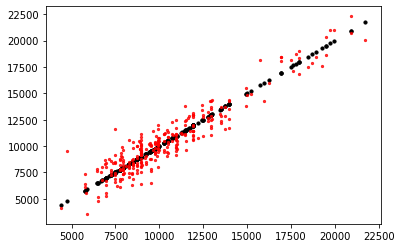

In [ ]:
# Plot the erorrs
plt.scatter(y_test,y_test, s=10, color='black')
plt.scatter(y_test,y_pred, alpha=0.8, s=5, color = 'red')
plt.show()

Here we can see how well the predicted y performed against the acual y. The black diagonale line representes y_test, while the red dots is y_pred

#### LinearRegression() <a id = LinearRegression>

In [ ]:
# Import the needed libary
from sklearn import linear_model

# Define the model
model = linear_model.LinearRegression()

# Fit the model
model = model.fit(X_train, y_train)

In [ ]:
# Look at the outcomes
print(f'The R squared of the model is: {model.score(X_train, y_train)*100:.4f}%') # R squared
print(f'The coefficients of the model is: {model.coef_}')  # The coefficients
print(f'The intercept of the model is: {model.intercept_:}') # The intercept

#for i in range(len(X.columns)):
#    print(f'The coefficient of {X.columns[i]:<16} is {model.coef_[i]:.4f}')

The R squared of the model is: 89.0563%
The coefficients of the model is: [-1.10077036e+02 -1.95018149e-02  3.58547262e+01  5.33163691e+02
  1.55851625e+02  1.63237026e+01  2.23823376e+02  8.09540390e+01
  1.72588516e+02  3.17596274e+03  1.99754798e+02  4.87958078e+02
  4.03531652e+02 -1.94324101e+02 -1.28076799e+03  7.67093773e+02
  5.13674219e+02]
The intercept of the model is: 10944.797275698777


In [ ]:
# Predict on the test set:
pred_y = model.predict(X_test)

In [ ]:
# Calculate the R squared for the test data

print(f'The R squared of the model is: {model.score(X_test, y_test)*100:.4f}%') # R squared

The R squared of the model is: 87.7462%


## Logistic Regression <a id = LogReg >

In logistic regression we differanciate between binary and mulitclass classification. With binary classification, we want to find out wheater a dataset is going to be 1 or 0 (two options). This could for example be whether a person will buy insurance or not. In a multiclass classification, we want to find out what the dataset is going to be. How many outputs there can be will vary. For example we could find out whether a person will vote democratic, republic or independent (3 types), or we could ind out what number a handwritten number will represent, then the output would have 10 different types (0-9). An important function for logistic regression is the <a href = https://en.wikipedia.org/wiki/Sigmoid_function>Sigmoid function</a>

For the first example, we are going to follow the 'Insurance data'-example from class.

In [ ]:
# Import the needed packages
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

#### Example 1: Insurance data (Binary classification) <a id = LogRegE1>

In [ ]:
# Import the data and take a look at the shape and head
df = pd.read_csv('Insurance_Data.csv')
print(df.shape)
df.head()

(27, 2)


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


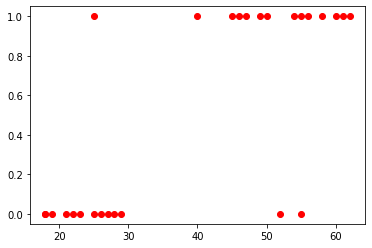

In [ ]:
# Let us plot the data

plt.scatter(df['age'], df['bought_insurance'], color='red')
plt.show()

Now we will split the data in to training and test set, and the define and fit the model

In [ ]:
# First define X and y
X = df[['age']]
y = df['bought_insurance']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, shuffle = True)
# df[['age']] makes the reshape(-1,1) unnecessary

In [ ]:
# One-dimentional objects sometimes cause problems (important!), therefore we will convert everything in to dataframes

#print(y_train.shape, type(y_train))
#y_train = pd.DataFrame(y_train)
#print(y_train.shape, type(y_train))

#y_test = pd.DataFrame(y_test)
#X_train = pd.DataFrame(X_train)
#X_test = pd.DataFrame(X_test)

In [ ]:
# Define the model
model = LogisticRegression()

In [ ]:
# Fit the model
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_train)

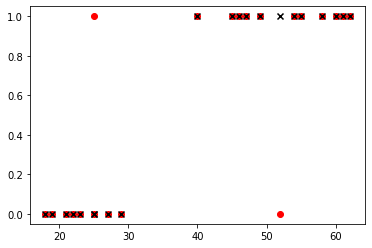

In [ ]:
# Plot the results
plt.scatter(X_train, y_train, c='red')
plt.scatter(X_train, y_pred, c='black', marker='x')
plt.show()

In [ ]:
# Check the accuray on the training set

print(f'Accuracy is: {model.score(X_train, y_train)}')

Accuracy is: 0.9047619047619048


In [ ]:
# Now do the prediction on the test set

y_pred = model.predict(X_test)

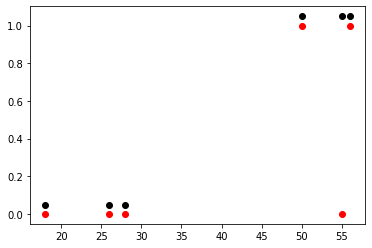

In [ ]:
# Plot the result

plt.scatter(X_test, y_test, c='red')
plt.scatter(X_test, y_pred+0.05, c='black')
plt.show()

In [ ]:
# Accuracy on the test set (remember it is random shuffeling)

print(f'Accuracy is: {model.score(X_test, y_test)}')

Accuracy is: 0.8333333333333334


In [ ]:
# Predicted probalilities

model.predict_proba(X_test)

array([[0.04843995, 0.95156005],
       [0.81857791, 0.18142209],
       [0.04178973, 0.95821027],
       [0.09933953, 0.90066047],
       [0.93956515, 0.06043485],
       [0.76807352, 0.23192648]])

#### Example 2: Financial condition of banks (Binary classification) <a id=LogRegE2>

In [ ]:
# Import the dataset and take a look at the shape and head
df = pd.read_csv("banks.csv")
df = df.drop('Obs', axis=1) #Removes a column we don't need
print(df.shape)
df.head()

(20, 4)


,Financial Condition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
0,1,9.7,0.12,0.65
1,1,1.0,0.11,0.62
2,1,6.9,0.09,1.02
3,1,5.8,0.10,0.67
4,1,4.3,0.11,0.69


In [ ]:
# Take a look at the 'Financial Condition' variable to the different values it can have
df['Financial Condition'].unique()

array([1, 0])

In [ ]:
# Now lets see the means for the different variables plotted against the financial condition variable
df.groupby('Financial Condition').mean()

,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
Financial Condition,,,
0,11.92,0.088,0.547
1,6.72,0.121,0.710


In [ ]:
df.head()

,Financial Condition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
0,1,9.7,0.12,0.65
1,1,1.0,0.11,0.62
2,1,6.9,0.09,1.02
3,1,5.8,0.10,0.67
4,1,4.3,0.11,0.69


From above table we may draw following conclusions:

**TotCap/Assets**: Total Capital per Assets is higher for strong banks

**TotExp/Assets**: Total Expenditures per assets are lower for stron g banks

**TotLns&Lses/Assets**: Total Loans & Leases per assets are less for strong banks


Now to get the best performing model, we will scale the data

In [ ]:
# Define the scaler
scaler = MinMaxScaler()

scaled = ['TotCap/Assets','TotExp/Assets','TotLns&Lses/Assets']
for col in scaled:
    df[col] = scaler.fit_transform(df[[col]])

In [ ]:
# Create dependent and independent variables

X = df.drop('Financial Condition', axis = 1)
y = df['Financial Condition']

# Because the set only consist of 20 datapoints, we will not split to train/test.
# Split to train and test set
#X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, shuffle=True)

In [ ]:
# Define the model
model = LogisticRegression()

In [ ]:
# Fit the model
model.fit(X, y)

LogisticRegression()

In [ ]:
# For writing down the equation
print(model.coef_)
print(model.intercept_)


[[-0.93421196  1.21794818  0.82772756]]
[-0.44539252]


In [ ]:
# Model Score
model.score(X,y) #Remember to fit the model on training set!!!

0.95

In [ ]:
y_pred = model.predict(X)

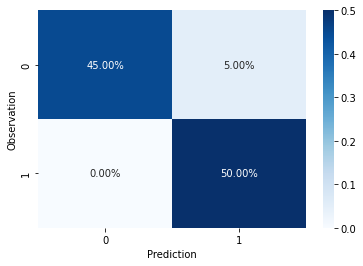

In [ ]:
# Make the confusion matrix
cf_matrix = confusion_matrix(y, y_pred)

# Generate the heatmap using seaborn
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot= True, fmt='.2%', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Observation')
plt.show()

There is still more we can do with the model. Check out 'Exercise_02' for more.

#### Example 3: Income Class (Multiclass classification) <a id = incomeClass>

In [ ]:
# Import the data and take look at it
df = pd.read_csv('Income_Class.csv')
print(df.shape)
print(df.info())
df.head()

(2001, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           2001 non-null   int64
 1   Income Class  2001 non-null   int64
dtypes: int64(2)
memory usage: 31.4 KB
None


,Age,Income Class
0,40,2
1,24,1
2,24,1
3,49,3
4,46,3


In [ ]:
df['Income Class'].value_counts()

2    725
3    723
1    553
Name: Income Class, dtype: int64

As we can see, there are no null-values, and 3 different types of income classes. Our goal is to make a model that can predict the income class based on the age (which is the only variable we got). We will therefor start with making a scatterplot and then split to test and training set, before we try to make the model. Normaly we would also scale the data, but since we only got one variable, we will not do that.

This will most likely don't be a great model because we only got one variable, namely the 'age' variable.

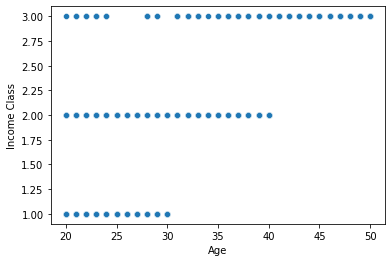

In [ ]:
sb.scatterplot(x=df['Age'],y=df['Income Class'])
plt.show()

In [ ]:
# Define the scaler
scaler = MinMaxScaler()

# Scale the age variable
#df['Age_Scaled'] = scaler.fit_transform(df[['Age']])

In [ ]:
# Define X and y
X = df['Age']
y = df['Income Class']

# Split to training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, shuffle=True)

In [ ]:
# One-dimentional objects sometimes cause problems (important!), therefore we will convert everything in to dataframes

print(y_train.shape, type(y_train))
y_train = pd.DataFrame(y_train)
print(y_train.shape, type(y_train))

y_test = pd.DataFrame(y_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

(1600,) <class 'pandas.core.series.Series'>
(1600, 1) <class 'pandas.core.frame.DataFrame'>


In [ ]:
# Define the model
model = LogisticRegression()

# Fit the mdoel
model.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# The model parameters are the following
print(f'Slopes are: {model.coef_}')
print(f'Intercept is: {model.intercept_}')

Slopes are: [[-0.43308204]
 [-0.01272299]
 [ 0.44580503]]
Intercept is: [ 13.91486629   2.0602883  -15.97515459]


In [ ]:
# Model Score
score = model.score(X_train,y_train)
print(f'The score of the model is: {score*100:.2f}%')

The score of the model is: 83.81%


In [ ]:
# Make predictions
y_train_pred = model.predict(X_train)

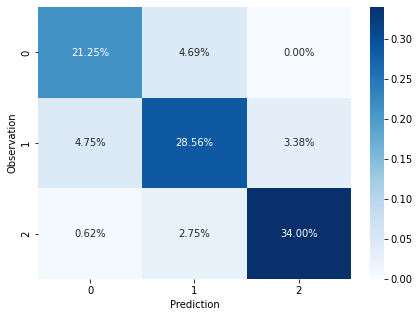

In [ ]:
# Create a confussion matrix and heatmap
cm = confusion_matrix(y_train,y_train_pred)

plt.figure(figsize=(7,5))
hm(cm/np.sum(cm), annot = True, fmt='.2%', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Observation')
plt.show()

As we can see, the models seem to perform okay. Now let's test it on the test data

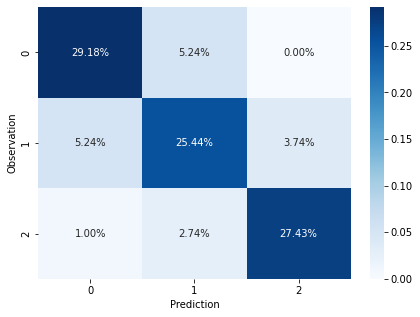

The score of the model is: 82.04%


In [ ]:
# Make predictions
y_test_pred = model.predict(X_test)

# Make confussion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(7,5))
hm(cm/np.sum(cm), annot = True, fmt='.2%', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Observation')
plt.show()

# Model Score
score = model.score(X_test,y_test)
print(f'The score of the model is: {score*100:.2f}%')

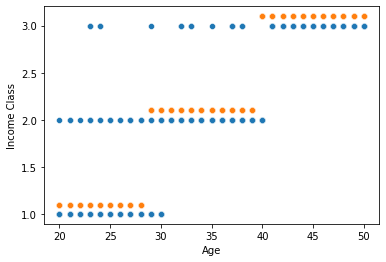

In [ ]:
# Add the results to the test-data
y_test['Pred'] = y_test_pred

# Plot the results
sb.scatterplot(x=X_test['Age'],y=y_test['Income Class'])
sb.scatterplot(x=X_test['Age'],y=y_test['Pred']+0.1)
plt.show()

I would say the model is quite good considering we only got one variable (Age).

## Naive Bayes Classification <a id = NBC>

In Naive Bayes Classification the goal is to classify a datapoint to a specific class(?). For example if you are a loan manager and want to classify customers which are risky and which are safe. The first example we are going to follow is 'Personal Loan Acceptance' from class.

In [ ]:
# Import the needed libaries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from seaborn import heatmap as hm

In [ ]:
# Import the data and take a look at it
df = pd.read_csv('UniversalBank.csv')
df = df[['Online','CreditCard', 'Personal Loan']] #We will only use these three variables
print(df.shape)
print(df.info())
df.head()

(5000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Online         5000 non-null   int64
 1   CreditCard     5000 non-null   int64
 2   Personal Loan  5000 non-null   int64
dtypes: int64(3)
memory usage: 117.3 KB
None


,Online,CreditCard,Personal Loan
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,1,0


Nice! As we can see, there are no <a href = #NV>null-values</a> and also no 'object'-data that need to be <a href = #LabelEncoder>encoded</a>. We then start by dividing the data in to a <a href = #TTS>training and test set</a>.

In [ ]:
# Split to training and test set (60/40)
df_train,df_test = train_test_split(df, train_size = 0.6, shuffle = True)

We can generate a pivot table to get some more info <a id = PiviotTable>

In [ ]:
df_train.pivot_table(index = 'Online', columns = 'CreditCard', aggfunc='sum')

Personal Loan    
CreditCard             0   1
Online                      
0                     78  32
1                    125  48

In [ ]:
# Define X and y
X_train, y_train = df_train[['Online','CreditCard']], df_train['Personal Loan']
X_test, y_test = df_test[['Online','CreditCard']], df_test['Personal Loan']

#### GaussianNB <a id = GaussianNB> 

In [ ]:
# Define the model
model = GaussianNB()

In [ ]:
# Fit the model
model = model.fit(X_train,y_train)
# Predict the model
y_pred = model.predict(X_train)

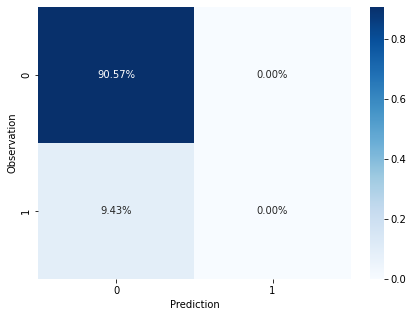

The score of the model is: 90.57%


In [ ]:
# Create a confussion matrix and heatmap
cm = confusion_matrix(y_train,y_pred)

plt.figure(figsize=(7,5))
hm(cm/np.sum(cm), annot = True, fmt='.2%', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Observation')
plt.show()

print(f'The score of the model is: {model.score(X_train,y_train)*100:.2f}%')

Even though we got a good score, we can see that the model failed to predict any of the '1' observations right, therefor our model is quite shit. We will now try how well it performs on the test set.

In [ ]:
# Predict on the y_test
y_test_pred = model.predict(X_test)

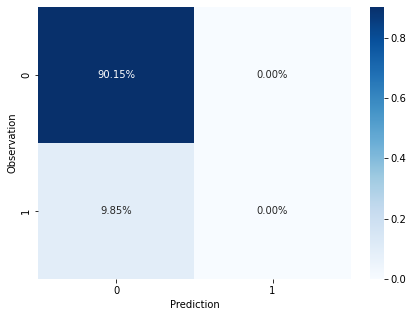

The score of the model is: 90.15%


In [ ]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(7,5))
hm(cm/np.sum(cm), annot = True, fmt='.2%', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Observation')
plt.show()

print(f'The score of the model is: {model.score(X_test,y_test)*100:.2f}%')

Again, not a good performance.

## K-Means Clustering <a id = KMC>

K-Means Clustering is used to identify different clusters among a dataset. This can be useful for example for a salesman who want to identify different types of customers so that he can give different offers to them. To use K-means Clustering, the clusters must be homogeneous and spherical clusters, if not the method won't work. To know how many clusters that is the optimal soultion, we will use an <a href = https://en.wikipedia.org/wiki/Elbow_method_(clustering) >elbow-plot</a>. We would get better and better performance, the more clusters we add, but then the clusters would not be helpful. Therefore we should use an elbow-plot. To get the best results we should also scale the data using <a href = https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html >MinMaxScaler</a> from SKlearn. We will again follow a exercise from class, namely the 'income'-exercise. This exercise can be found <a href = https://youtu.be/EItlUEPCIzM >here</a>. We will not split to training and test set in this exercise.

In [ ]:
# Import the needed libaries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
# Import the data and take a look at it
df = pd.read_csv('income.csv')
print(df.shape)
df.head()

(22, 3)


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


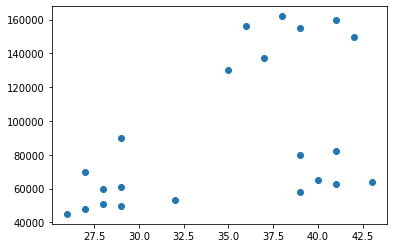

In [ ]:
# Let's plot the age against the income
plt.scatter(df['Age'],df['Income($)'])
#sb.scatterplot(x=df['Age'],y=df['Income($)'])
plt.show()

As we can see from this scatterplot, there are clearly 3 clusters (Bottom left, bottom right and top rigth). This means that we should use 3 clusters. Let's try that and see

In [ ]:
# Define the model
km = KMeans(n_clusters=3)

# Fit the model
km.fit(df[['Age','Income($)']])

# Predict and adds to the datafram
predicted = km.predict(df[['Age','Income($)']])
df['Predicted'] = predicted

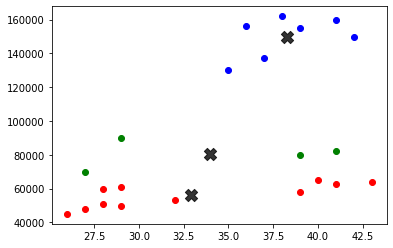

In [ ]:
# Make different dataframes for each cluster
df0 = df[df['Predicted'] == 0 ]
df1 = df[df['Predicted'] == 1 ]
df2 = df[df['Predicted'] == 2 ]

# Plot the clusters against each other
plt.scatter(df0['Age'],df0['Income($)'], color = 'red')
plt.scatter(df1['Age'],df1['Income($)'], color = 'blue')
plt.scatter(df2['Age'],df2['Income($)'], color = 'green')

# Define the clusters
clusters = km.cluster_centers_

# Plot the cluster centers
plt.scatter(clusters[:,0], clusters[:,1], color = 'black', marker = 'X', s=150, alpha=0.8)

plt.show()

This does not seem right. That is becuase we have not scaled our data. Therefore we must scale the data before trying to identify clusters.

#### MinMaxScaler <a id = MinMaxScalerKM>

In [ ]:
# Define the scaler
scaler = MinMaxScaler()

In [ ]:
# Fit the scaler on 'Age'
scaler.fit(df[['Age']]) #Remember double brackets [[

# Transform the 'Age'-variable
df['Age'] = scaler.transform(df[['Age']])

In [ ]:
# Fit the scaler on 'Income($)'
scaler.fit(df[['Income($)']]) #Remember double brackets [[

# Transform the 'Income($)'-variable
df['Income($)'] = scaler.transform(df[['Income($)']])

In [ ]:
scaled = ['col1','col2','col3']
#for col in scaled:
#    df[col] = scaler.fit_transform(df[[col]])

In [ ]:
# Now take a new look at the dataframe
df.head()

,Name,Age,Income($),Predicted
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


As we can see, the data is scaled, with every value between 0 and 1. We will now try to make the cluster-model again and see how it performs.

In [ ]:
# Define the model
km = KMeans(n_clusters=3)

# Fit the model
km.fit(df[['Age','Income($)']])

# Predict and adds to the datafram
predicted = km.predict(df[['Age','Income($)']])
df['Predicted'] = predicted

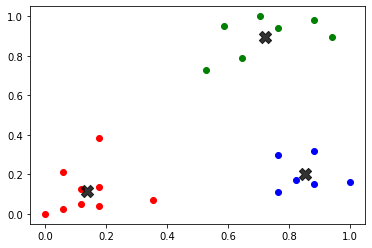

In [ ]:
# Make different dataframes for each cluster
df0 = df[df['Predicted'] == 0 ]
df1 = df[df['Predicted'] == 1 ]
df2 = df[df['Predicted'] == 2 ]

# Plot the clusters against each other
plt.scatter(df0['Age'],df0['Income($)'], color = 'red')
plt.scatter(df1['Age'],df1['Income($)'], color = 'blue')
plt.scatter(df2['Age'],df2['Income($)'], color = 'green')

# Define the clusters
clusters = km.cluster_centers_

# Plot the cluster centers
plt.scatter(clusters[:,0], clusters[:,1], color = 'black', marker = 'X', s=150, alpha=0.8)

plt.show()

This time it performed much better! We will now try to see how an elbow plot looks

#### Elbow plot <a id = ElbowPlot >

In [ ]:
sse = [] #Sum of Squared Errors

k_range = range(1,10)

for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_) # Adds the sum of squared error to the list

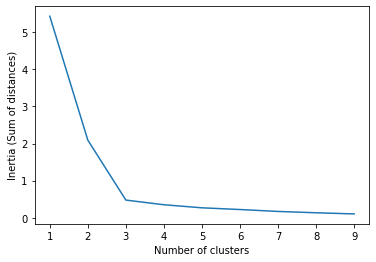

In [ ]:
plt.plot(k_range, sse)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Sum of distances)')
plt.show()

We can clearly see the "elbow" on k = 3. This means that the optimal number of clusters is 3. As told before, the elbow plot is much more relevant when we have more than 2 variables (can't use scatterplot to visualize that).

## Artificial Neural Network <a id = ANN>

Artificial Neural Network works much the same way as our braincells. It is often used to identify relationships that is not easily explained mathematically. An example of an neural network can be the classic axample of a network identifying and classifying hand-written numbers. We differnciate between <b>prediction</b> and <b>classification</b> (binary/multiclass). Prediction can be compared to linear regression, for example for predicting a car's price based on different inputs. And classification can be compared to logistic regression, for example whether a person will buy a product or not (binary), or what party a person will vote for (multiclass).

When it comes to choosing a activation function for your neural network, the usual function is the `relu` function. Others beeing: `sigmoid, linear, tanh, softmax`. Read about the different activation functions <a href = https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/>here</a>

In [ ]:
# Import needed packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

#### Prediction <a id = prediction>

Activation function: `linear, relu`. The example we are going to go thru here is the Toyota Corolla price prediction from class.

In [ ]:
# Import the data and take a look
df = pd.read_csv('ToyotaCorolla.csv')

In [ ]:
# Define the columns we need for this assignment
df = df[['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors','Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model',  'Tow_Bar']]

In [ ]:
print(df.shape)
print(df.info())
df.head()

(1436, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             1436 non-null   int64 
 1   Age_08_04         1436 non-null   int64 
 2   KM                1436 non-null   int64 
 3   Fuel_Type         1436 non-null   object
 4   HP                1436 non-null   int64 
 5   Automatic         1436 non-null   int64 
 6   Doors             1436 non-null   int64 
 7   Quarterly_Tax     1436 non-null   int64 
 8   Mfr_Guarantee     1436 non-null   int64 
 9   Guarantee_Period  1436 non-null   int64 
 10  Airco             1436 non-null   int64 
 11  Automatic_airco   1436 non-null   int64 
 12  CD_Player         1436 non-null   int64 
 13  Powered_Windows   1436 non-null   int64 
 14  Sport_Model       1436 non-null   int64 
 15  Tow_Bar           1436 non-null   int64 
dtypes: int64(15), object(1)
memory usage: 179.6+ KB
N

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar
0,13500,23,46986,Diesel,90,0,3,210,0,3,0,0,0,1,0,0
1,13750,23,72937,Diesel,90,0,3,210,0,3,1,0,1,0,0,0
2,13950,24,41711,Diesel,90,0,3,210,1,3,0,0,0,0,0,0
3,14950,26,48000,Diesel,90,0,3,210,1,3,0,0,0,0,0,0
4,13750,30,38500,Diesel,90,0,3,210,1,3,1,0,0,1,0,0


As we can see, there are one variable which is not numeric, namely the `Fuel_Type`. Therefore we will have to use a LabelEncoder to make it numeric. After that we will scale the data using the `MinMaxScaler`. We also observe that there is no null-values.

In [ ]:
# Create the Label Encoder
le = LabelEncoder()

# Transform the data
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])

In [ ]:
# Define the scaler
scaler = MinMaxScaler()

# Make a list of the variables we are going to scale
scaled_var = ['Price','Age_08_04','KM','HP','Doors','Quarterly_Tax','Guarantee_Period','Fuel_Type']

for col in scaled_var:
    # Make a name for the scaled variable
    scaled_var_name = str(col) + '_scaled'
    # Fit the scaler on the variable
    scaler.fit(df[[col]])
    # Transform the variable
    df[scaled_var_name] = scaler.transform(df[[col]])

In [ ]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,...,Sport_Model,Tow_Bar,Price_scaled,Age_08_04_scaled,KM_scaled,HP_scaled,Doors_scaled,Quarterly_Tax_scaled,Guarantee_Period_scaled,Fuel_Type_scaled
0,13500,23,46986,1,90,0,3,210,0,3,...,0,0,0.325044,0.278481,0.193355,0.170732,0.333333,0.723485,0.0,0.5
1,13750,23,72937,1,90,0,3,210,0,3,...,0,0,0.333925,0.278481,0.300149,0.170732,0.333333,0.723485,0.0,0.5
2,13950,24,41711,1,90,0,3,210,1,3,...,0,0,0.341030,0.291139,0.171647,0.170732,0.333333,0.723485,0.0,0.5
3,14950,26,48000,1,90,0,3,210,1,3,...,0,0,0.376554,0.316456,0.197528,0.170732,0.333333,0.723485,0.0,0.5
4,13750,30,38500,1,90,0,3,210,1,3,...,0,0,0.333925,0.367089,0.158433,0.170732,0.333333,0.723485,0.0,0.5


When we now look at the data, we can see that all the variables are numeric and between 0 and 1. We will now split in to training and test set, and then build the neural network.

In [ ]:
# Define X and y
X = df[['Fuel_Type_scaled', 'Automatic', 'Mfr_Guarantee', 'Airco',
       'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model',
       'Tow_Bar', 'Guarantee_Period_scaled', 'Age_08_04_scaled', 'KM_scaled',
       'HP_scaled', 'Doors_scaled', 'Quarterly_Tax_scaled']]
y = df['Price_scaled']

# Split to training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8)

In [ ]:
# One-dimentional objects sometimes cause problems (important!), therefore we will convert everything in to dataframes

print(y_train.shape, type(y_train))
y_train = pd.DataFrame(y_train)
print(y_train.shape, type(y_train))

y_test = pd.DataFrame(y_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

(1148,) <class 'pandas.core.series.Series'>
(1148, 1) <class 'pandas.core.frame.DataFrame'>


In [ ]:
# Define the input and output dimension. We do this so we don't have to hard-code it.
NumVar = X.shape[1]
NumOut = y_test.shape[1] #Be sure that it is a dataframe, else it won't run

In [ ]:
# Create the model

model = Sequential()
model.add(Dense(2, input_dim = NumVar, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(NumOut, activation = 'linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 32        
                                                                 
 dense_1 (Dense)             (None, 12)                36        
                                                                 
 dense_2 (Dense)             (None, 10)                130       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


2021-12-13 08:47:38.885477: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Make and implement early-stopping 

model.compile(loss = 'mse', optimizer = 'adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor = 'loss', patience = 2, verbose = 1)

In [ ]:
# Fit the model

history = model.fit(X_train, y_train,
                    epochs = 50,
                    batch_size = 1,
                    verbose = 1,
                    callbacks = [early_stop],
                    shuffle = True) # Try to shuffle, will the model change?

Epoch 1/50
1148/1148 [==============================] - 1s 637us/step - loss: 0.0147 - accuracy: 8.7108e-04
Epoch 2/50
1148/1148 [==============================] - 1s 602us/step - loss: 0.0051 - accuracy: 8.7108e-04
Epoch 3/50
1148/1148 [==============================] - 1s 596us/step - loss: 0.0034 - accuracy: 8.7108e-04
Epoch 4/50
1148/1148 [==============================] - 1s 595us/step - loss: 0.0026 - accuracy: 8.7108e-04
Epoch 5/50
1148/1148 [==============================] - 1s 602us/step - loss: 0.0021 - accuracy: 8.7108e-04
Epoch 6/50
1148/1148 [==============================] - 1s 595us/step - loss: 0.0020 - accuracy: 8.7108e-04
Epoch 7/50
1148/1148 [==============================] - 1s 605us/step - loss: 0.0019 - accuracy: 8.7108e-04
Epoch 8/50
1148/1148 [==============================] - 1s 592us/step - loss: 0.0018 - accuracy: 8.7108e-04
Epoch 9/50
1148/1148 [==============================] - 1s 598us/step - loss: 0.0018 - accuracy: 8.7108e-04
Epoch 10/50
1148/1148 [=====

We have now built a neural network and trained it on the training data. Let's see how well it performed

In [ ]:
# Make predictions
y_train_pred = (model.predict(X_train))
y_test_pred = (model.predict(X_test))

# Add the predictions to the observed values
y_train["Pred"] = y_train_pred
y_test['Pred'] = y_test_pred

# Print the r2 score
print(f'The r2 score of the training set is: {r2_score(y_train["Price_scaled"], y_train["Pred"])*100:.4f}%')
print(f'The r2 score of the test set is: {r2_score(y_test["Price_scaled"], y_test["Pred"])*100:.4f}%')

The r2 score of the training set is: 90.0714%
The r2 score of the test set is: 89.6949%


We will now invert the scaled variables back to its original value. This is done to illustrate the errors a bit better

In [ ]:
# Invert the price and predicted price in y_train
for col in y_test.columns:
    scaler.fit(df[['Price']])
    y_test[col] = scaler.inverse_transform(y_test[[col]])
    
# Invert the scaled variables in X_train just in case    
scaled_var2 = ['Guarantee_Period_scaled', 'Age_08_04_scaled', 'KM_scaled', 'HP_scaled','Doors_scaled', 'Quarterly_Tax_scaled','Fuel_Type_scaled']
    
for col in scaled_var2:
    scaler.fit(df[[col[:-7]]])
    X_test[col] = scaler.inverse_transform(X_test[[col]])

In [ ]:
# Add the error-column to the test set
y_test['Error'] = abs(y_test['Price_scaled']-y_test['Pred'])

# Add a percentage error-column to the test set
y_test['Error_per'] = abs(y_test['Error']/y_test['Price_scaled'])

In [ ]:
y_test = y_test.round(decimals=2)
mean = y_test['Error'].mean().round(decimals=2)
mean_per = (y_test['Error_per'].mean()*100).round(decimals=2)
max_error = y_test['Error'].max().round(decimals=2)

print(f"The mean errors is: {mean}, which is {mean_per}%")
#print(f"The mean error is: {(y_test['Error_per'].mean()*100).round(decimals=2)}%")
print(f"The maximum error is: {max_error}")

The mean errors is: 905.65, which is 8.32%
The maximum error is: 7954.81


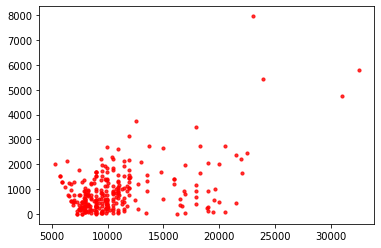

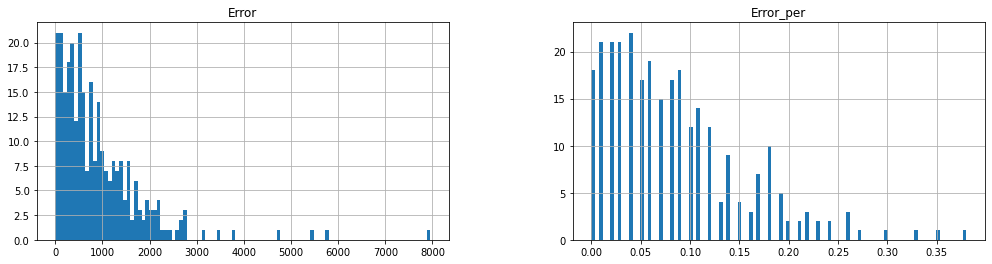

In [ ]:
plt.scatter(y_test['Price_scaled'],y_test['Error'],s=10, alpha=0.8, color='red')
y_test[['Error','Error_per']].hist(bins=100, figsize=(17,4))

plt.show()

As we can see, the model is quite good, with an avarage error of around 10% (will change for each time you run the jupyter file). 

#### Classification (Binary) <a id = classificationBin>

Activation function: `sigmoid`, loss: `binary_crossentropy`. The example which will be used here is from exercise 10: Classification: Credit Card Default

<b> From the description of Exercise 10:</b>                                                                      
The goal of this exercise is to predict whether a customer defaults on his /her credit card.
The data is taken from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

The output variable is a binary variable for default payment (Yes = 1, No = 0)

The input variables are the following:

1. Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
2. Gender (1 = male; 2 = female).
3. Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
4. Marital status (1 = married; 2 = single; 3 = others).
5. Age (year).
6. the repayment status in September, 2005
7. the repayment status in August, 2005
8. the repayment status in July, 2005
9. the repayment status in June, 2005
10. the repayment status in May, 2005
11. the repayment status in April, 2005
12. amount of bill statement in September, 2005
13. amount of bill statement in August, 2005
14. amount of bill statement in July, 2005
15. amount of bill statement in June, 2005
16. amount of bill statement in May, 2005
17. amount of bill statement in April, 2005
18. amount paid in September, 2005
19. amount paid in August, 2005
20. amount paid in July, 2005
21. amount paid in June, 2005
22. amount paid in May, 2005
23. amount paid in April, 2005.

The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

In [ ]:
# Import the data and take a look at it
df = pd.read_csv("Default.csv", delimiter=';', header=1, index_col='ID')
print(df.shape)
df.head()

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Let's first check for null-values, then transform *gender*, *education*, *marital status*, and *repayment status* into dummy variables.

In [ ]:
# Check for null-values
#df.isnull().sum()

In [ ]:
# Nice, no null values. We continue with making dummy variables for some of the variables
df_dummy_var = pd.get_dummies(df_dummy_var)
dummy_var_list = ['SEX','EDUCATION','MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

dum = 0

for col in dummy_var_list:
    dum += len(df[col].unique())
    df[col].value_counts
    df_dummy = pd.get_dummies(df[[col]].astype(str))
    df = pd.concat([df,df_dummy],axis=1)

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,1,0,0,0,0,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,90000,2,2,2,34,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,50000,2,2,1,37,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,0,0,1,0,0,0,0,0,0,0


That was a bit messy, but now we hade made the dummy-variables we need. Now we will scale the data using a MinMaxScaler

In [ ]:
# Define the scaler
scaler = MinMaxScaler()

# Make a list of the variables we are going to scale
scaled_var = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
               'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# To have a df with the original values, we make a copy
df_original = df.copy()

for col in scaled_var:
    # Fit the scaler on the variable
    scaler.fit(df[[col]])
    
    # Transform the variable
    df[col] = scaler.transform(df[[col]])

In [ ]:
df.head(8)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
ID,,,,,,,,,,,,,,,,,,,,,
1,0.010101,2,2,1,0.051724,2,2,-1,-1,-2,...,0,1,0,0,0,0,0,0,0,0
2,0.111111,2,2,2,0.086207,-1,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.080808,2,2,2,0.224138,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.040404,2,2,1,0.275862,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0.040404,1,2,1,0.620690,-1,0,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0.040404,1,1,2,0.275862,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0.494949,1,1,2,0.137931,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0.090909,2,2,2,0.034483,0,-1,-1,0,0,...,1,0,0,0,0,0,0,0,0,0


Now we have succeded with scaling the data, so the next thing is to split the data in to training and test set, and then make the model and train it.

In [ ]:
# Define X and y
X = df.drop(['SEX','EDUCATION','MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default payment next month'],axis=1)
y = df['default payment next month']

# Split to training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8)

In [ ]:
# One-dimentional objects sometimes cause problems (important!), therefore we will convert everything in to dataframes

print(y_train.shape, type(y_train))
y_train = pd.DataFrame(y_train)
print(y_train.shape, type(y_train))

y_test = pd.DataFrame(y_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

(24000,) <class 'pandas.core.series.Series'>
(24000, 1) <class 'pandas.core.frame.DataFrame'>


In [ ]:
# Define the input and output dimension. We do this so we don't have to hard-code it.
NumVar = X_train.shape[1]
NumOut = y_test.shape[1] #Be sure that it is a dataframe, else it won't run
print(NumVar, NumOut)

91 1


In [ ]:
# Create the model

model = Sequential()
model.add(Dense(2, input_dim = NumVar, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(NumOut, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 184       
                                                                 
 dense_5 (Dense)             (None, 12)                36        
                                                                 
 dense_6 (Dense)             (None, 10)                130       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Make and implement early-stopping 

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor = 'loss', patience = 2, verbose = 1)

In [ ]:
# Fit the model

history = model.fit(X_train, y_train,
                    epochs = 10,
                    batch_size = 100,
                    verbose = 1,
                    callbacks = [early_stop],
                    shuffle = True) # Try to shuffle, will the model change?

Epoch 1/10
240/240 [==============================] - 1s 863us/step - loss: 0.5179 - accuracy: 0.7772
Epoch 2/10
240/240 [==============================] - 0s 773us/step - loss: 0.4506 - accuracy: 0.8096
Epoch 3/10
240/240 [==============================] - 0s 748us/step - loss: 0.4438 - accuracy: 0.8148
Epoch 4/10
240/240 [==============================] - 0s 767us/step - loss: 0.4402 - accuracy: 0.8185
Epoch 5/10
240/240 [==============================] - 0s 777us/step - loss: 0.4386 - accuracy: 0.8198
Epoch 6/10
240/240 [==============================] - 0s 754us/step - loss: 0.4376 - accuracy: 0.8189
Epoch 7/10
240/240 [==============================] - 0s 755us/step - loss: 0.4372 - accuracy: 0.8198
Epoch 8/10
240/240 [==============================] - 0s 755us/step - loss: 0.4364 - accuracy: 0.8198
Epoch 9/10
240/240 [==============================] - 0s 761us/step - loss: 0.4363 - accuracy: 0.8203
Epoch 10/10
240/240 [==============================] - 0s 760us/step - loss: 0.436

In [ ]:
# Make predictions
y_train_pred = (model.predict(X_train))
y_test_pred = (model.predict(X_test))

# Add the predictions to the observed values
y_train["Pred"] = y_train_pred.round()
y_test['Pred'] = y_test_pred.round()

# Print the r2 score of the model
print(f"The r2 score of the training set is: {(r2_score(y_train['default payment next month'], y_train['Pred'])*100):.4f}%")
print(f"The r2 score of the test set is: {(r2_score(y_test['default payment next month'], y_test['Pred'])*100):.4f}%")

The r2 score of the training set is: -3.0178%
The r2 score of the test set is: -2.1432%


In [ ]:
y_test.head()

,default payment next month,Pred
ID,,
14002,0,0.0
11204,0,0.0
24111,0,0.0
16835,1,1.0
15655,0,0.0


Now we have predicted the output and added that to our dataframe. Let's make a variable for the error, and then try to make a confussion matrix

In [ ]:
y_train['Error'] = y_train['default payment next month']-y_train['Pred']
y_test['Error'] = y_test['default payment next month']-y_test['Pred']

In [ ]:
(y_test['Error'].value_counts())

 0.0    4961
 1.0     793
-1.0     246
Name: Error, dtype: int64

In [ ]:
acc = accuracy_score(y_test['default payment next month'], y_test['Pred'])
print('Accuracy: %.3f' % acc)

Accuracy: 0.827


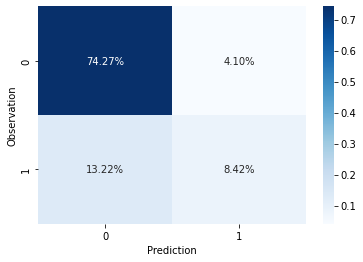

In [ ]:
# Make the confussion matrix
cf_matrix = confusion_matrix(y_test['default payment next month'],y_test['Pred'])

# Generate the heatmap using seaborn
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot= True, fmt='.2%', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Observation')
plt.show()
plt.show()

As we can see, the model is not so good.

#### Classification (Multiclass) <a id = classificationMulti>

Activation function: `softmax`, loss: `sparse_categorical_crossentropy`. Not we are going to predict what income class a person belongs to based on his/hers age. To see a better example, check out the digits dataset from sklearn in the torturials 2.0.

In [ ]:
# Import data and take a look it
df = pd.read_csv('Income_Class.csv')
print(df.shape)
print(df.info())
df.head()

(2001, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           2001 non-null   int64
 1   Income Class  2001 non-null   int64
dtypes: int64(2)
memory usage: 31.4 KB
None


,Age,Income Class
0,40,2
1,24,1
2,24,1
3,49,3
4,46,3


In [ ]:
df['Income Class'].value_counts()

2    725
3    723
1    553
Name: Income Class, dtype: int64

As we can see, there are no null-values, and 3 different types of income classes. Our goal is to make a model that can predict the income class based on the age (which is the only variable we got). We will therefor start with making a scatterplot, then make a Label Encoder for the classes. Thats done because we will get an error if not. After that we will scale the age-variable, and then split to test and training set, before we try to make the model.

This will most likely don't be a great model because we only got one variable, namely the 'age' variable.

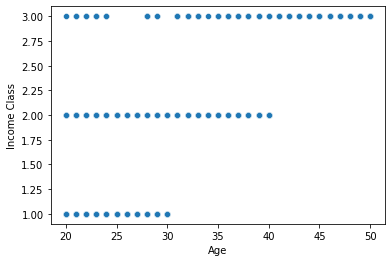

In [ ]:
sb.scatterplot(x=df['Age'],y=df['Income Class'])
plt.show()

In [ ]:
# Define the label encoder
le = LabelEncoder()

# Transform the variable
df['Income Class'] = le.fit_transform(df['Income Class'])

In [ ]:
df.head()

,Age,Income Class
0,40,1
1,24,0
2,24,0
3,49,2
4,46,2


As we can see, we now also use a 0 for the income classes. We could also have subtracted 1 from every class to do the same.

In [ ]:
# Define the scaler
scaler = MinMaxScaler()

# Scale the age variable
df['Age_Scaled'] = scaler.fit_transform(df[['Age']])

In [ ]:
# Define X and y
X = df['Age_Scaled'] #_Scaled
y = df['Income Class']

# Split to training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, shuffle=True)

In [ ]:
# One-dimentional objects sometimes cause problems (important!), therefore we will convert everything in to dataframes

print(y_train.shape, type(y_train))
y_train = pd.DataFrame(y_train)
print(y_train.shape, type(y_train))

y_test = pd.DataFrame(y_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

(1600,) <class 'pandas.core.series.Series'>
(1600, 1) <class 'pandas.core.frame.DataFrame'>


In [ ]:
NumVar = len(X_train.columns)
NumOut = len(y_train['Income Class'].unique())
print(NumVar, NumOut)

1 3


In [ ]:
# Create the model

model = Sequential()
model.add(Dense(2, input_dim = NumVar, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(NumOut, activation = 'softmax'))
#model.summary()

In [ ]:
# Make and implement early-stopping 

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor = 'loss', patience = 2, verbose = 1)

In [ ]:
# Fit the model

history = model.fit(X_train, y_train,
                    epochs = 10,
                    batch_size = 1,
                    verbose = 1,
                    callbacks = [early_stop],
                    shuffle = True) # Try to shuffle, will the model change?

Epoch 1/10
1600/1600 [==============================] - 1s 637us/step - loss: 0.7754 - accuracy: 0.6350
Epoch 2/10
1600/1600 [==============================] - 1s 618us/step - loss: 0.4608 - accuracy: 0.8325
Epoch 3/10
1600/1600 [==============================] - 1s 621us/step - loss: 0.4272 - accuracy: 0.8519
Epoch 4/10
1600/1600 [==============================] - 1s 631us/step - loss: 0.4137 - accuracy: 0.8562
Epoch 5/10
1600/1600 [==============================] - 1s 622us/step - loss: 0.4056 - accuracy: 0.8606
Epoch 6/10
1600/1600 [==============================] - 1s 620us/step - loss: 0.4000 - accuracy: 0.8637
Epoch 7/10
1600/1600 [==============================] - 1s 618us/step - loss: 0.3929 - accuracy: 0.8550
Epoch 8/10
1600/1600 [==============================] - 1s 626us/step - loss: 0.3845 - accuracy: 0.8694
Epoch 9/10
1600/1600 [==============================] - 1s 625us/step - loss: 0.3782 - accuracy: 0.8631
Epoch 10/10
1600/1600 [==============================] - 1s 623u

In [ ]:
# Predict on the test set
y_pred = model.predict([X_test])

# Use argmax to find the highest probability
y_pred = np.argmax(y_pred, axis=1)

# Add prediction to test set
y_test['Pred'] = y_pred

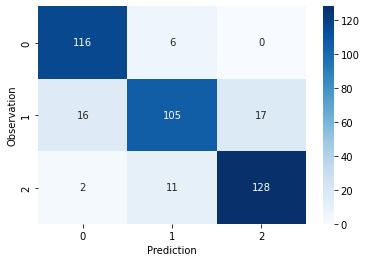

In [ ]:
# Make the confussion matrix
cf_matrix = confusion_matrix(y_test['Income Class'],y_test['Pred'])

# Generate the heatmap using seaborn
sb.heatmap(cf_matrix, annot = True, fmt='.0f', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Observation')
plt.show()

As we can see, the confussion matrix uses 0 insted of 1, 1 insted of 2 and 2 instead of 3. This can we fix for the scatterplot:

In [ ]:
# Invert the scaled variables
scaler.fit(df[['Age']])
X_test['Age_Scaled'] = scaler.inverse_transform(X_test[['Age_Scaled']])

# Get back the old classes
y_test['Income Class'] += 1
y_test['Pred'] += 1

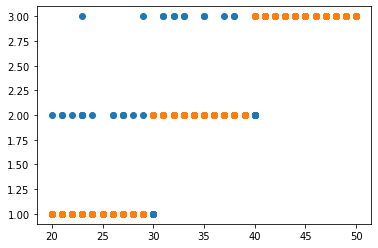

In [ ]:
plt.scatter(X_test['Age_Scaled'], y_test['Income Class'])
plt.scatter(X_test['Age_Scaled'], y_test['Pred'])
plt.show()

As we can see, the model works as expected, and because we only have one variable, the performace is very limited.

## <a href = #top > Click here to get to the top </a>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7a076037-bdbc-4d12-92b5-75ebface7fab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>